# Plot the Eigenvalues using data from the simulations

# Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from numpy import random 
import pandas as pd

# Setting some system parameters

In [2]:
color = 'black'
normalized = 1

# Loading Data from Symmetric Solution

In [3]:
evalsymdata = pd.read_csv('CylindricalSystem/build/evals.csv').values
num_rows, num_cols = evalsymdata.shape

# Defining Functions 

In [4]:
def nanv(v):
    vout = [None]*len(v)
    for i in range(len(v)):
        if np.fabs(v[i]) > 1.e-7:
            vout[i] = v[i]
        else:
            vout[i] = np.nan
    return vout



def normalize(v,tf):
    if tf==1:
        vtemp = [None]*len(v)
        for i in range(len(v)):
            vtemp[i] = v[i]/v[0]

        return vtemp 
    vtemp = v.copy()
    return vtemp


def getcolumn(Mat,k):
    earray = [None]*len(Mat);
    for i in range(len(Mat)):
        earray[i] = Mat[i][k]

    return earray


# Plotting Eigenvalues

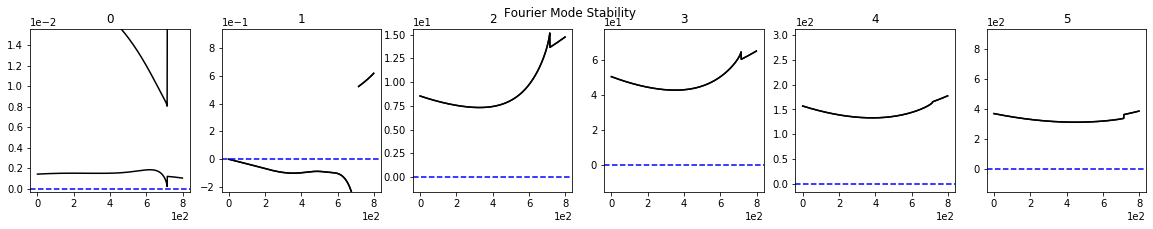

In [5]:
normalized = 0
nevals = 5
fig2, ax2 = plt.subplots(1,nevals+1)
evalasymdata = [None] * nevals;


ax2[0].plot(normalize(evalsymdata,normalized), color = color)
ax2[0].title.set_text(str(0))
for i in range(1,nevals+1):
    evtemp = pd.read_csv('Cylindrical3DStability/build/evals'+str(i)+'.csv').values
    jstart = 1
    ax2[i].title.set_text(str(i))
    if i==1:
        jstart = 1

    for j in range(jstart,len(evtemp[0])+1):
        coldata = getcolumn(evtemp,j-1)
        ax2[i].plot(nanv(normalize(coldata,normalized)), color = color)

for i in range(nevals+1):
    ax2[i].axhline(y=0.0,color = 'blue',linestyle='--')

for i in range(nevals+1):
    #print(str(num_rows))
    #ax2[i].set_xlim([0.,num_rows])
    ax2[i].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

refinelevel = 5.
axsc = 1000.*pow(2.,-1.*refinelevel)
ax2[0].set_ylim([axsc*-1.e-5,axsc*5.e-4])
ax2[1].set_ylim([axsc*-7.5e-3 ,axsc*3.e-2])
ax2[2].set_ylim([axsc*-5.e-2,axsc*5.e-1])
ax2[3].set_ylim([axsc*-5.e-1,axsc*2.5e0])
ax2[4].set_ylim([axsc*-5.e-1,axsc*1.e1])
ax2[5].set_ylim([axsc*-5.e-0,axsc* 3.e1])
fig2.suptitle("Fourier Mode Stability")
fig2.set_size_inches(20., 3.)
plt.show()